In [58]:
from preprocessing.preprocess_ucr import UCRDatasetImporter
from preprocessing.data_pipeline import build_data_pipeline
from utils import load_yaml_param_settings
import matplotlib.pyplot as plt
from utils import time_to_timefreq, timefreq_to_time
import torch

In [59]:
config_dir = 'configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['stage1']
train_data_loader, test_data_loader = [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

self.X_train.shape: (896, 945)
self.X_test.shape: (3582, 945)
# unique labels (train): [0 1 2 3 4 5 6 7]
# unique labels (test): [0 1 2 3 4 5 6 7]


In [60]:
X = torch.tensor(train_data_loader.dataset.X).unsqueeze(1)

In [61]:
X.shape

torch.Size([896, 1, 945])

In [117]:
import torch
import torch.nn.functional as F

def masked_stft_transform(X, n_fft=8, p=0.5):
    """
    Apply STFT, mask the spectrogram randomly, and then apply the inverse STFT.

    Args:
    X (torch.Tensor): Input batch of time series of shape (batch_size, 1, time_series_length).
    n_fft (int): Number of FFT components.
    hop_length (int): Number of audio samples between adjacent STFT columns.
    win_length (int): Size of STFT window.

    Returns:
    torch.Tensor: Batch of modified time series.
    """
    # Compute STFT
    X_stft = torch.stft(X.squeeze(1), n_fft=n_fft, return_complex=True)
    
    # Generate random mask
    mask = torch.rand_like(X_stft.real) > 0.5  # Adjust the threshold to control the sparsity of the mask

    # Apply mask
    X_stft_masked = X_stft * mask

    # Inverse STFT
    X_modified = torch.istft(X_stft_masked, n_fft=n_fft, length=X.size(-1))

    # Original Spectrogram
    plt.subplot(1, 2, 1)
    plt.title("Original Spectrogram")
    plt.imshow(torch.log(torch.abs(X_stft) + 1e-8).numpy(), aspect='auto', origin='lower')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    # Masked Spectrogram
    plt.subplot(1, 2, 2)
    plt.title("Masked Spectrogram")
    plt.imshow(torch.log(torch.abs(X_stft_masked) + 1e-8).numpy(), aspect='auto', origin='lower')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return X_modified.unsqueeze(1)
    

TypeError: Invalid shape (896, 5, 473) for image data

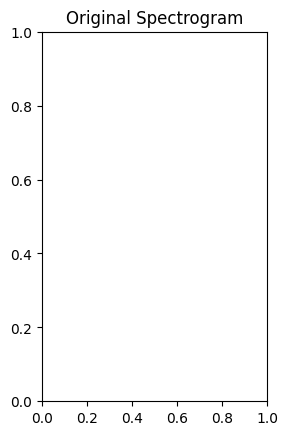

In [118]:
X_masked1 = masked_stft_transform(X, p=0.5)
X_masked2 = masked_stft_transform(X, p=0.1)
X_masked3 = masked_stft_transform(X, p=0.9)

In [115]:
X_masked3.shape

torch.Size([896, 1, 945])

TypeError: Invalid shape (896, 5, 473) for image data

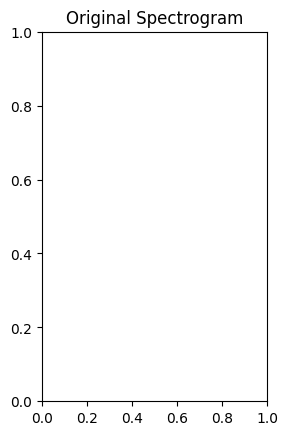

In [119]:
#X_masked1 = masked_stft_transform(X, p=0.5)
#X_masked2 = masked_stft_transform(X, p=0.1)
X_masked3 = masked_stft_transform(X, p=0.2)

plt.plot(X[0][0])
#plt.plot(X_masked1[0][0])
#plt.plot(X_masked2[0][0])
plt.plot(X_masked3[0][0])